<a href="https://colab.research.google.com/github/ntanphu/CST-KHMT-HK251/blob/main/Members%20/NguyenTanPhu/Chap1_2_Introduction_basicknowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chương 1. TỔNG QUAN

 #### 1.1 Bối cảnh và động lực nghiên cứu

 Trong lĩnh vực học sâu hiện đại, quá trình tối ưu hóa giữ vai trò quyết định đối với hiệu năng của mô hình. Các thuật toán tối ưu hóa truyền thống như Gradient Descent (GD), Stochastic Gradient Descent (SGD), Momentum hay Nesterov Accelerated Gradient (NAG) [1] tuy đã được chứng minh hiệu quả trong nhiều thiết lập, nhưng vẫn tồn tại những hạn chế cố hữu. Cụ thể, chúng yêu cầu lựa chọn tốc độ học tối ưu một cách thủ công, dễ bị ảnh hưởng bởi sự thay đổi trong phân phối gradient, và thường gặp khó khăn khi xử lý các mô hình có không gian tham số lớn hoặc hàm mất mát không lồi.

 Sự phát triển của các thuật toán tối ưu hóa thích nghi như AdaGrad [2], RMSProp [3], AdaDelta [4] và Adam [5,6] đã tạo ra bước tiến đáng kể khi các phương pháp này tự điều chỉnh tốc độ học theo đặc trưng của từng tham số. Trong nhóm này, AdaDelta và Adam nổi bật nhờ khả năng hội tụ nhanh và giảm đáng kể sự phụ thuộc vào việc tinh chỉnh thủ công siêu tham số. Tuy nhiên, chính sự khác biệt trong cơ chế hoạt động, bao gồm cách ước lượng gradient bậc nhất/bậc hai, cách tích lũy và điều chỉnh động tốc độ học, dẫn đến những hành vi hội tụ khác nhau, đôi khi gây tranh luận trong cộng đồng nghiên cứu về tính ổn định và khả năng tổng quát hóa.

 Mặc dù cả AdaDelta và Adam đều được triển khai rộng rãi, vẫn tồn tại những khoảng trống trong việc hiểu sâu về điều kiện mà mỗi thuật toán hoạt động hiệu quả, các kịch bản mà một thuật toán vượt trội hơn thuật toán còn lại, và mức độ nhạy cảm của chúng đối với siêu tham số. Thực tế cho thấy Adam thường hội tụ nhanh nhưng có thể gặp vấn đề về tổng quát hóa, trong khi AdaDelta ổn định hơn nhưng đôi khi chậm thích nghi trong các giai đoạn đầu huấn luyện. Những vấn đề này chưa được phân tích một cách hệ thống trong nhiều nghiên cứu ứng dụng.

Chính vì vậy, việc tiến hành đánh giá và so sánh hai thuật toán này dưới cả góc độ lý thuyết và thực nghiệm là cần thiết nhằm: (1) làm rõ đặc tính hội tụ, độ ổn định và hành vi tối ưu hóa; (2) xác định ưu–nhược điểm trong những bối cảnh huấn luyện khác nhau; và (3) cung cấp cơ sở khoa học cho việc lựa chọn thuật toán tối ưu trong thực tiễn. Những động lực này định hướng cho nghiên cứu hiện tại, đồng thời góp phần bổ sung hiểu biết về cách các thuật toán tối ưu hóa thích nghi vận hành trong các mô hình học sâu quy mô lớn.

 #### 1.2 Mục tiêu nghiên cứu

 Mục tiêu của nghiên cứu này là phân tích và đánh giá một cách hệ thống hai thuật toán tối ưu hóa thích nghi phổ biến trong học sâu, bao gồm AdaDelta và Adam. Nghiên cứu tập trung làm rõ các đặc tính lý thuyết và hành vi thực nghiệm của từng thuật toán, từ đó chỉ ra những điểm tương đồng, khác biệt và điều kiện ứng dụng hiệu quả. Cụ thể, nghiên cứu hướng tới các mục tiêu sau:

* Phân tích lý thuyết cơ chế cập nhật tham số, giả định nền tảng và các đặc điểm quan trọng chi phối tốc độ hội tụ của AdaDelta và Adam.

* Đánh giá thực nghiệm thông qua việc triển khai và thử nghiệm hai thuật toán trong các mô hình học sâu tiêu biểu, nhằm quan sát sự khác biệt về tốc độ hội tụ, độ ổn định và khả năng tổng quát hóa.

* So sánh hiệu năng dựa trên các chỉ số định lượng như giá trị hàm mất mát, độ chính xác, và mức độ nhạy cảm với siêu tham số.

* Xác định ưu điểm và hạn chế của từng thuật toán, từ đó đưa ra nhận định về phạm vi ứng dụng phù hợp trong các bối cảnh huấn luyện khác nhau.

* Định hướng lựa chọn thuật toán tối ưu, góp phần hỗ trợ người dùng và các nhà nghiên cứu lựa chọn phương pháp tối ưu hóa thích hợp cho các mô hình học sâu hiện đại.

Thông qua các mục tiêu trên, nghiên cứu kỳ vọng cung cấp cái nhìn toàn diện và có giá trị thực tiễn về hai thuật toán AdaDelta và Adam, đồng thời đóng góp vào việc nâng cao hiệu quả của quá trình huấn luyện mô hình trong lĩnh vực học sâu.

#### 1.3 Phạm vi và giới hạn

Nghiên cứu này giới hạn trong việc phân tích và so sánh hai thuật toán tối ưu hóa thích nghi AdaDelta và Adam, phù hợp với mục tiêu làm rõ đặc tính hoạt động và hiệu năng của chúng đã nêu ở phần trước. Các đánh giá thực nghiệm được thực hiện trên một số mô hình học sâu cơ bản và các bộ dữ liệu chuẩn ở quy mô nhỏ, nhằm quan sát hành vi hội tụ và độ ổn định trong những điều kiện minh họa.

Do chỉ tập trung vào hai thuật toán chính và phạm vi mô hình hạn chế, nghiên cứu không hướng đến việc khảo sát toàn bộ các thuật toán tối ưu hóa thích nghi khác hoặc đánh giá trên các kiến trúc mạng và tập dữ liệu phức tạp hơn. Vì vậy, kết quả mang tính mô tả và định hướng, phù hợp với phạm vi nghiên cứu nhưng không đại diện đầy đủ cho mọi bối cảnh ứng dụng trong học sâu.

#### 1.4 Cấu trúc báo cáo

Báo cáo được tổ chức thành 5 chương như sau:

**Chương 1:** Tổng quan

**Chương 2:** Kiến thức cơ sở

**Chương 3:** Thuật toán AdaDelta và Adam

**Chương 4:** Thực nghiệm và đánh giá

**Chương 5:** Kết luận và hướng phát triển.

## Chương 2. KIẾN THỨC CƠ SỞ

#### 2.1 Gradient Descent
#### 2.1.1 Ý tưởng thuật toán
Xét bài toán tối ưu một biến với hàm số $f(x) = \frac{1}{2}(x - 1)^2 - 2$, có bảng biến thiên và đồ thị như trong Hình~1.1. Ký hiệu $x^{*}$ là điểm cực trị của hàm số, khi đó ta có $f'(x^{*}) = 0$. Đường tiếp tuyến với đồ thị hàm số tại một điểm bất kỳ có hệ số góc bằng đúng giá trị của đạo hàm tại điểm đó. Quan sát từ Hình 2.1 cho thấy: các điểm nằm bên trái $x^{*}$ có đạo hàm âm, trong khi các điểm nằm bên phải $x^{*}$ có đạo hàm dương. Đồng thời, càng xa $x^{*}$ về phía bên trái thì đạo hàm càng âm, và càng xa về phía bên phải thì đạo hàm càng dương.

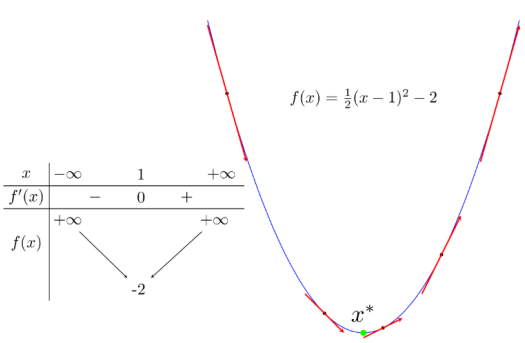

Hình 2.1: Minh hoạ hàm số $f(x) = \frac{1}{2}(x - 1)^2 - 2$.

Giả sử $x_t$ là điểm thu được sau vòng lặp thứ $t$. Mục tiêu của ta là xây dựng một thuật toán sao cho $x_t$ hội tụ và tiến gần đến $x^{*}$. Từ hình vẽ, ta có thể rút ra nhận xét sau:

* Nếu đạo hàm tại $x_t$ thỏa $f'(x_t) > 0$ thì $x_t$ nằm về phía bên phải của $x^{*}$ (và ngược lại). Do đó, để điểm kế tiếp $x_{t+1}$ gần với $x^{*}$ hơn, ta cần dịch chuyển $x_t$ theo hướng ngược lại dấu của đạo hàm.
	\begin{equation}
		x_{t+1} = x_t + \Delta
	\end{equation}

	trong đó $\Delta$ là một đại lượng ngược dấu với đạo hàm $f'(x_t)$.

* $x_t$ càng xa $x^{*}$ về phía bên phải thì $f'(x_t)$ càng lớn hơn $0$ (và ngược lại). Vậy, lượng di chuyển $\Delta$, một cách trực quan, là tỉ lệ thuận với $-f'(x_t)$.

Từ nhận xét trên, ta có một cập nhật đơn giản:
\begin{equation}
	x_{t+1} = x_t - \eta f'(x_t)
\end{equation}
trong đó $\eta$ là một số dương được gọi là tốc độ học. Dấu trừ thể hiện việc chúng ta phải đi ngược dấu đạo hàm (đây cũng là lý do phương pháp này được gọi là Gradient Descent — đi ngược đạo hàm).

#### 2.1.2 Batch Gradient Descent
Batch Gradient Descent [1] là phương pháp trong đó gradient của hàm mục tiêu đối với tham số $\theta$ được tính dựa trên toàn bộ tập dữ liệu. Ở phần trước, ta đã khảo sát trường hợp hàm một biến; bây giờ ta mở rộng sang hàm nhiều biến. Giả sử mục tiêu của ta là tìm điểm cực tiểu toàn cục của một hàm $f(\theta)$, trong đó $\theta$ là một vector chứa các tham số của mô hình cần tối ưu. Đạo hàm của hàm tại một vị trí bất kỳ được biểu diễn dưới dạng gradient và được ký hiệu là $\nabla_{\theta} f(\theta)$. Tương tự như trường hợp một biến, Gradient Descent cho hàm nhiều biến bắt đầu từ một điểm khởi tạo $\theta_0$; tại vòng lặp thứ $t$, quy tắc cập nhật được viết dưới dạng:
\begin{equation}
	\theta_{t+1} = \theta_t - \eta \nabla_{\theta} f(\theta_t),
\end{equation}
trong đó $\eta$ là tốc độ học.

Với Batch Gradient Descent, gradient được tính từ toàn bộ dữ liệu huấn luyện trong mỗi lần cập nhật. Điều này khiến thuật toán trở nên chậm và tốn tài nguyên, đặc biệt khi kích thước dữ liệu lớn và không thể đưa toàn bộ vào bộ nhớ. Hơn nữa, phương pháp này không phù hợp với môi trường học trực tuyến (online learning), bởi mỗi khi xuất hiện dữ liệu mới, việc cập nhật lại yêu cầu tính gradient trên toàn bộ tập dữ liệu, dẫn đến chi phí tính toán rất cao và làm mất đi tính “online” của quá trình tối ưu.

Trong thực tế, một biến thể đơn giản nhưng hiệu quả hơn thường được sử dụng, đó là Stochastic Gradient Descent (SGD).

#### 2.1.3 Stochastic Gradient Descent
Trong thuật toán này, tại mỗi thời điểm ta chỉ sử dụng một điểm dữ liệu $x_i$ để tính gradient của hàm mục tiêu, rồi cập nhật tham số $\theta$ dựa trên gradient đó. Quá trình này được lặp lại lần lượt cho toàn bộ các điểm dữ liệu, sau đó tiếp tục lặp lại nhiều vòng. Mặc dù cách làm rất đơn giản, phương pháp này lại tỏ ra hiệu quả trong thực tế.

Một lần duyệt qua toàn bộ tập dữ liệu được gọi là một epoch. Đối với Gradient Descent dạng batch, mỗi epoch chỉ tương ứng với một lần cập nhật tham số. Ngược lại, với SGD, một epoch bao gồm $N$ lần cập nhật $\theta$, với $N$ là số lượng mẫu dữ liệu. Nhìn từ góc độ này, việc cập nhật sau từng điểm dữ liệu có thể khiến thời gian hoàn thành một epoch lâu hơn. Tuy nhiên, xét ở góc độ khác, SGD [1] thường chỉ cần một số lượng epoch nhỏ để đạt nghiệm tốt (thường khoảng 10 epoch cho lần huấn luyện đầu, và khi có dữ liệu mới chỉ cần chạy dưới một epoch). Điều này khiến SGD phù hợp với các bài toán có quy mô dữ liệu lớn và các ứng dụng đòi hỏi cập nhật mô hình liên tục, tức là chế độ học online. Một điểm quan trọng là sau mỗi epoch, ta cần thực hiện “xáo trộn” lại thứ tự dữ liệu để đảm bảo tính ngẫu nhiên, vì điều này ảnh hưởng trực tiếp đến hiệu quả của thuật toán.

Tóm lại, SGD cập nhật tham số cho từng mẫu huấn luyện $x^{(i)}$ với nhãn $y^{(i)}$ theo công thức:
\begin{equation}
	\theta = \theta - \eta \nabla_{\theta} J(\theta; x^{(i)}, y^{(i)}).
\end{equation}

Nếu Batch Gradient Descent tạo ra một đường giảm hàm mất mát “mượt”, thì SGD lại có thể đưa tham số nhảy nhanh tới các vùng nghiệm tốt hơn. Mặc dù vậy, tính chất cập nhật theo từng mẫu khiến đường hội tụ có thể dao động mạnh và đôi khi vượt qua cực tiểu. Tuy nhiên, nhiều nghiên cứu chỉ ra rằng khi giảm dần tốc độ học, SGD không chỉ hội tụ nhanh hơn Batch Gradient Descent mà còn gần như chắc chắn tiến về một điểm cực tiểu cục bộ hoặc toàn cục của hàm mục tiêu.

#### 2.1.4 Mini-Batch Gradient Descent
Trong mini-batch gradient descent, thay vì chỉ sử dụng một mẫu dữ liệu như trong SGD, ta sử dụng một nhóm gồm $n$ điểm dữ liệu cho mỗi lần cập nhật, trong đó $n$ lớn hơn 1 nhưng vẫn nhỏ hơn rất nhiều so với kích thước toàn bộ tập dữ liệu $N$. Tương tự SGD, thuật toán bắt đầu mỗi epoch bằng cách xáo trộn dữ liệu một cách ngẫu nhiên rồi chia thành nhiều nhóm nhỏ (mini-batch), mỗi nhóm chứa $n$ mẫu, ngoại trừ nhóm cuối có thể ít hơn nếu $N$ không chia hết cho $n$. Ở mỗi bước cập nhật, thuật toán lấy một mini-batch để tính gradient và cập nhật tham số. Công thức cập nhật có dạng:
\begin{equation}
	\theta = \theta - \eta \, J(\theta; x^{(i:i+n)}, y^{(i:i+n)}),
\end{equation}
trong đó $x^{(i:i+n)}$ biểu thị các mẫu dữ liệu từ vị trí $i$ đến $i+n-1$ theo cách đánh chỉ số thường thấy trong Python. Sau mỗi epoch, dữ liệu cần được xáo trộn lại để đảm bảo tính ngẫu nhiên trong các mini-batch. Mini-batch gradient descent được sử dụng rộng rãi trong hầu hết các bài toán học máy, đặc biệt là trong học sâu. Kích thước mini-batch thường được chọn trong khoảng từ 50 đến 256. Nhìn chung, phương pháp này giúp giảm phương sai của cập nhật tham số so với SGD, từ đó mang lại quá trình hội tụ ổn định hơn.

#### 2.1.5 Các vấn đề của Gradient Descent
Mặc dù mini-batch gradient descent được sử dụng rộng rãi, thuật toán này không đảm bảo khả năng hội tụ tốt trong mọi trường hợp và vẫn tồn tại một số vấn đề cần được quan tâm:

\item \textbf{Lựa chọn learning rate phù hợp:} Nếu tốc độ học quá nhỏ, mô hình sẽ tiến gần nghiệm tối ưu một cách rất chậm; ngược lại, nếu quá lớn, quá trình tối ưu có thể dao động quanh điểm cực tiểu hoặc thậm chí bị phân kỳ, khiến việc hội tụ trở nên khó khăn.
* **Thiết lập lịch điều chỉnh learning rate:** Việc giảm dần learning rate theo thời gian hoặc khi hàm mục tiêu đạt đến một mức ngưỡng nào đó có thể cải thiện quá trình học. Tuy nhiên, các phương pháp đặt lịch cố định này thường phải được xác định từ trước và không tự thích ứng với mọi loại dữ liệu hay bài toán.
* **Learning rate đồng nhất cho mọi tham số:** Gradient descent mặc định sử dụng cùng một tốc độ học cho toàn bộ tham số của mô hình, trong khi thực tế mỗi tham số có thể cần mức độ điều chỉnh khác nhau để đạt hiệu quả tối ưu.
* **Khó khăn khi vượt qua cực tiểu địa phương và điểm yên ngựa:** Những vị trí có gradient xấp xỉ bằng 0 theo mọi chiều, đặc biệt là các điểm yên ngựa có thể khiến quá trình tối ưu bị chậm lại đáng kể. Một hướng tiếp cận là chạy gradient descent nhiều lần với các điểm khởi tạo khác nhau và so sánh kết quả. Cách này đôi khi giúp phát hiện các nghiệm tốt hơn, nhưng vẫn không đảm bảo tìm được cực tiểu toàn cục.

Do những hạn chế trên, phần tiếp theo sẽ trình bày các thuật toán cải tiến dựa trên gradient descent như Momentum, NAG hay AdaGrad, nhằm khắc phục các vấn đề nêu trên.

#### 2.2 Momentum
Thuật toán Gradient Descent thường được hình dung giống như việc một hòn bi chuyển động dưới tác dụng của trọng lực trên một bề mặt có dạng thung lũng (Hình 2.2a Dù hòn bi được đặt tại vị trí A hay B, nó luôn lăn xuống điểm cuối C. Tuy nhiên, nếu bề mặt có nhiều đáy thung lũng như minh họa ở Hình 2.2b, thì tùy thuộc vào vị trí ban đầu, hòn bi có thể dừng lại ở C hoặc mắc kẹt tại D. Điểm D là một cực tiểu địa phương, điều mà ta không mong muốn, như đã được đề cập khi thảo luận về các hạn chế của gradient descent.
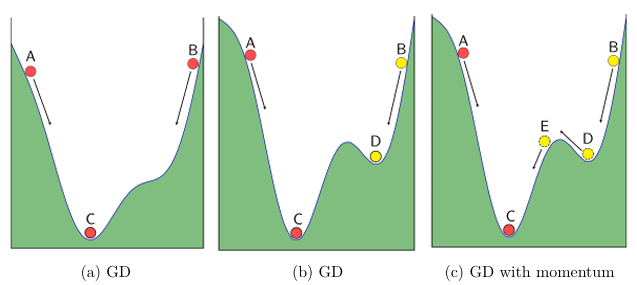

Hình 2.2: So sánh gradient với các hiện tượng vật lý

Nếu xét hiện tượng này theo góc nhìn vật lý, vẫn ở Hình 2.2b, giả sử hòn bi ở vị trí B được truyền một vận tốc ban đầu đủ lớn. Khi lăn xuống điểm D, quán tính có thể giúp nó tiếp tục vượt lên sườn dốc phía bên trái của D. Nếu vận tốc ban đầu càng lớn, hòn bi có thể tiến tới điểm E và sau đó lăn xuống C, như trong Hình 2.2c. Đây chính là hành vi mong đợi: vượt qua cực tiểu địa phương để đạt nghiệm tốt hơn. Dựa trên quan sát vật lý này, thuật toán Momentum [7] ra đời nhằm giảm khả năng Gradient Descent dừng lại tại những cực tiểu không mong muốn.

Trong Gradient Descent, ta tính độ dịch chuyển tại thời điểm $t$ để cập nhật vị trí nghiệm (tương tự vị trí của hòn bi). Nếu xem đại lượng dịch chuyển này như vận tốc $v_t$ trong cơ học, thì cập nhật tham số có dạng:
\begin{equation}
	\theta_{t+1} = \theta_t - v_t,
\end{equation}
với dấu trừ biểu thị rằng ta di chuyển ngược hướng gradient. Mục tiêu của ta là xây dựng $v_t$ sao cho nó vừa phản ánh thông tin từ gradient, vừa bao gồm thông tin về đà chuyển động (tức vận tốc ở bước trước $v_{t-1}$). Ta giả sử vận tốc ban đầu $v_0 = 0$. Một cách hình thành $v_t$ đơn giản là kết hợp tuyến tính có trọng số của vận tốc cũ và gradient hiện tại:
\begin{equation}
	v_t = \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta),
\end{equation}
trong đó $\gamma$ thường được chọn khoảng $0.9$, $v_{t-1}$ là vận tốc từ vòng lặp trước, còn $\nabla_\theta J(\theta)$ là gradient tại vị trí hiện tại. Sau đó, tham số được cập nhật theo: $\theta = \theta - v_t.$. Tóm lại, ta có dạng đầy đủ của thuật toán Momentum:
\begin{align}
	v_t &= \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta), \\
	\theta &= \theta - v_t.
\end{align}

Về mặt trực quan, sử dụng Momentum giống như việc đẩy một quả bóng lăn xuống một thung lũng: bóng liên tục tích lũy vận tốc khi di chuyển và vì vậy ngày càng nhanh hơn. Tuy nhiên, nó vẫn chịu tác động của lực cản như ma sát hoặc lực cản không khí, điều này được mô hình hóa bằng hệ số $\gamma < 1$.

#### 2.3 Nesterow accelerated gradient
Momentum hỗ trợ quá trình tối ưu hóa vượt qua những vùng có gradient nhỏ nhờ tích lũy quán tính, tuy nhiên một hạn chế đáng chú ý là khi thuật toán tiến gần đến nghiệm tối ưu, quán tính này khiến quá trình giảm tốc diễn ra chậm, dẫn đến độ trễ trước khi dừng lại. Hiện tượng này bắt nguồn từ việc vận tốc tích lũy tiếp tục đẩy tham số vượt quá vùng cần thiết. Nesterov Accelerated Gradient (NAG) [8,9] được đề xuất nhằm khắc phục hạn chế này và tăng tốc độ hội tụ.

Ý tưởng cốt lõi của NAG là ước lượng trước vị trí mà tham số có xu hướng tiến tới, tức là ước lượng trước điểm cập nhật tiếp theo. Cụ thể, thành phần momentum $\gamma v_{t-1}$ cho phép ta dự đoán điểm tiếp theo xấp xỉ là $\theta - \gamma v_{t-1}$ (tạm thời chưa kết hợp gradient vì nó sẽ được sử dụng trong bước cập nhật cuối). Nhờ vậy, thay vì tính gradient tại vị trí hiện tại, NAG sử dụng gradient tại điểm được dự đoán, phản ánh tốt hơn hướng đi trong tương lai. Quan sát Hình 2.3 cho thấy sự khác nhau giữa hai cách tiếp cận:

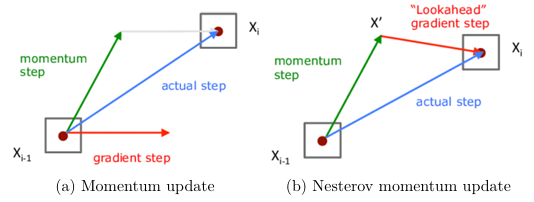

 Hình 2.3: Ý tưởng của Nesterov accelerated gradient

* Trong Momentum thông thường, cập nhật tại bước $t$ được xác định bởi tổng của vector momentum và gradient tại vị trí hiện tại.
* Với NAG, cập nhật được tạo thành từ vector momentum và gradient tại vị trí được ước lượng là bước tiếp theo.

Từ nguyên lý này, ta có được công thức cập nhật của NAG:
\begin{align}
	v_t &= \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta - \gamma v_{t-1})\\
	\theta &= \theta - v_t.
\end{align}

#### 2.4 AdaGrad
Trong phần trước, chúng ta đã đề cập rằng Gradient Descent [7] sử dụng một tốc độ học duy nhất cho toàn bộ các tham số. Tuy nhiên, trong thực tế mô hình hóa, có những tham số ít khi được kích hoạt và do đó cần những bước cập nhật lớn hơn; ngược lại, những tham số xuất hiện thường xuyên lại cần bước cập nhật nhỏ để tránh biến động quá mức. Hiện tượng này đặc biệt phổ biến trong các bài toán có dữ liệu thưa. Adagrad được đề xuất để xử lý vấn đề này bằng cách điều chỉnh tốc độ học theo từng tham số riêng biệt. Chẳng hạn, [10] đã áp dụng Adagrad trong quá trình huấn luyện GloVe (một mô hình word embedding trong NLP), nơi các từ hiếm cần bước cập nhật lớn hơn nhiều so với các từ phổ biến. Kết quả cho thấy Adagrad mang lại hiệu quả tốt hơn so với phương pháp Gradient Descent thông thường.

Trước đây, trong Gradient Descent, tất cả tham số $\theta$ được cập nhật đồng thời và cùng sử dụng một tốc độ học $\eta$. Adagrad thay đổi điều này bằng cách gán một tốc độ học riêng cho từng tham số $\theta_i$ tại mỗi bước $t$. Ký hiệu $g_t$ là gradient tại bước $t$, và $g_{t,i}$ là đạo hàm riêng theo tham số $\theta_i$:

\begin{equation}
	g_{t,i} = \nabla_{\theta_i} J(\theta_t).
\end{equation}

Khi đó, quy tắc cập nhật của Gradient Descent với từng tham số là:

\begin{equation}
	\theta_{t+1,i} = \theta_{t,i} - \eta \, g_{t,i}.
\end{equation}

Trong Adagrad, tốc độ học được điều chỉnh dựa trên tổng bình phương các gradient quá khứ của từng tham số. Cụ thể, tham số được cập nhật theo:

\begin{equation}
	\theta_{t+1,i}
	= \theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii}} + \epsilon} \, g_{t,i}.
\end{equation}

trong đó $G_t \in \mathbb{R}^{d \times d}$ là ma trận đường chéo, với phần tử $G_{t,ii}$ bằng tổng bình phương gradient của $\theta_i$ từ đầu quá trình huấn luyện đến thời điểm $t$, và $\epsilon$ là một hằng số nhỏ giúp tránh chia cho 0 (thường dùng $10^{-8}$). Thực nghiệm cho thấy việc dùng căn bậc hai trong mẫu số là cần thiết; nếu bỏ đi, thuật toán hoạt động kém hiệu quả hơn. Do $G_t$ tích lũy bình phương gradient dọc theo các bước lặp, công thức cập nhật tổng quát của Adagrad có thể viết dưới dạng vector:
\begin{equation}
	\theta_{t+1}
	= \theta_t
	- \frac{\eta}{\sqrt{G_t} + \epsilon} \odot g_t.
\end{equation}
trong đó ký hiệu “$\odot$” biểu diễn phép nhân theo từng phần tử. Trong thực hành, $\eta$ thường được chọn khoảng $0.01$. Ưu điểm đáng chú ý của Adagrad là khả năng điều chỉnh tốc độ học theo từng tham số, giúp tối ưu mô hình hiệu quả hơn khi dữ liệu có mức độ kích hoạt không đồng đều. Tuy nhiên, hạn chế lớn nhất của Adagrad là tổng bình phương gradient trong mẫu số liên tục tăng, làm cho tốc độ học giảm dần và có thể trở nên rất nhỏ sau một số epoch. Khi đó, thuật toán hầu như không còn khả năng tiếp tục học. Các thuật toán cải tiến ra đời sau này được thiết kế để khắc phục điểm yếu này.

#### 2.5 RMSProp
RMSProp [3] được phát triển nhằm cải thiện hạn chế của AdaGrad, cụ thể là việc tốc độ học giảm dần quá nhanh theo thời gian. Thay vì tích lũy toàn bộ bình phương gradient như AdaGrad, RMSProp sử dụng một trung bình có trọng số mũ của bình phương gradient, giúp thuật toán giữ được khả năng học trong thời gian dài hơn. Giá trị trung bình theo thời gian của bình phương gradient được cập nhật theo quy luật:
\begin{equation}
	s_t = \gamma s_{t-1} + (1 - \gamma)\,(g_t \odot g_t), \qquad \gamma \in [0,1]
\end{equation}

Trong đó, $\gamma$ thường được đặt khoảng $0.9$. Đại lượng $s_t$ phản ánh mức độ ``làm mịn'' của gradient trong quá trình tối ưu hóa. Sử dụng $s_t$, RMSProp cập nhật từng tham số theo công thức:
\begin{equation}
	\theta_{t+1}
	=\theta_t - \frac{\eta}{\sqrt{s_t} + \epsilon} \odot g_t,
\end{equation}

với $\epsilon$ là hằng số nhỏ nhằm tránh chia cho $0$ (thường dùng giá trị $10^{-8}$). Công thức này tương tự AdaGrad nhưng thay tổng bình phương gradient bằng một trung bình có trọng số mũ, giúp thuật toán giảm hiện tượng tốc độ học suy giảm đơn điệu.

#### 2.6 Kết luận
Trong các mô hình học máy hiện đại, bài toán tối ưu hoá hàm mất mát đóng vai trò trung tâm và thường được giải bằng các phương pháp dựa trên gradient. Các thuật toán cơ bản như Gradient Descent (GD) và Stochastic Gradient Descent (SGD) dựa trực tiếp trên kiến thức giải tích và tối ưu cơ bản, nhưng chúng bộc lộ nhiều hạn chế về mặt toán học và thực tiễn. Cụ thể, GD yêu cầu tính gradient trên toàn bộ tập dữ liệu và phụ thuộc mạnh vào việc lựa chọn tốc độ học, trong khi SGD – dù hiệu quả hơn, lại gây dao động lớn và hội tụ chậm trong các bài toán có điều kiện kém. Những cải tiến như Momentum phần nào khắc phục được hiện tượng này nhưng vẫn sử dụng một tốc độ học cố định cho toàn bộ không gian tham số, không phản ánh được cấu trúc hình học của hàm mục tiêu.

Để vượt qua những hạn chế đó, các phương pháp thích nghi theo từng chiều tham số được phát triển, với AdaGrad là đại diện đầu tiên. Tuy nhiên, cơ chế tích lũy gradient của AdaGrad lại khiến bước học suy giảm quá nhanh, làm hiệu quả tối ưu kém dần theo thời gian. Trong bối cảnh đó, hai thuật toán AdaDelta và Adam ra đời như các mở rộng mang tính toán học hợp lý: AdaDelta thay thế tổng tích lũy bằng trung bình động suy giảm để duy trì tốc độ học ổn định hơn, còn Adam kết hợp ưu điểm của Momentum và RMSProp, tạo ra một quy tắc cập nhật vừa có tính mượt vừa thích nghi tốt. Nhờ đó, AdaDelta và Adam trở thành hai phương pháp tối ưu quan trọng, minh họa cho cách tiếp cận toán học trong việc thiết kế các thuật toán hiệu quả cho học sâu.